# SalesPerson Fraud Detection_ANIL_KUMAR_B56

## Problem Description:

Here is a large US electrical appliances’ retailer with many branches. Salesmen are given freedom to set the price at which they sell the products and also quantity of products based on various factors. It means, for a single product, some salesmen may sell at a price higher/lower than others for some reasons. Similarly, constraint in terms of maximum or minimum quantity is not imposed. Thus, the average sale size and average quantity sold differ from transaction to transaction. These salespeople sell a set of products of the company and report these sales with a certain periodicity to the company. The data of transactions reported by the salespeople of the company over a short period of time is used for sales and productivity analysis. The data is of an undisclosed source and has been anonymized. 

Each row of data table includes information on one report by a salesman. This information includes his ID, report ID, product ID, the quantity and the total value reported by the salesman. You are invited to develop an error/fraud detection software. Towards building such system, you are required to develop a method to determine suspicious transactions which have high propensity to be error/fraud. The goal is to verify the veracity of these reports given past experience of the company that has detected both errors and fraud attempts in these transaction reports. The task boils down to build capability in terms of appropriate ratio analysis by studying similarities between products and salesmen to detect transactions that may indicate errors/fraud attempt by a sales person. You are expected to classify each report ID as Yes(suspicious) / No(not suspicious) / indeterminate(doubtful). Towards achieving this goal and for other strategic purposes, you are also required to segment the salesmen into high risk, medium risk and low/no risk categories from the standpoint of propensity to error/fraud. Objectives: In this hackathon, you are expected 

1. to do exploratory Data Analysis using visualizations 
2. to build the analytical framework to predict the propensity of suspicious transaction of each report using the transactions took place. 
3. to segment the salesmen into different risk categories from the standpoint of propensity to error/fraud which will be used for strategic purposes

##### Required modules

In [350]:
import numpy
import math
import matplotlib.pyplot as plt
import pandas as pd

from pandas import *

from keras.models import Sequential
from keras.layers import Dense, LSTM 

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

##### Setting current working directory

In [351]:
import os
PATH = os.getcwd()

In [352]:
os.chdir(PATH)

##### Loading Given SalesPerson dataset using the Pandas library. 


In [353]:
dataframe = pd.read_csv("Train.csv",header=0)

In [354]:
print (dataframe.head())

   ReportID SalesPersonID ProductID  Quantity  TotalSalesValue     Suspicious
0  Rep10101        C21116    PR6112       182             1665  indeterminate
1  Rep10102        C21116    PR6112       182             1740  indeterminate
2  Rep10103        C21116    PR6253       101             1040  indeterminate
3  Rep10104        C21116    PR6253       283             4495             No
4  Rep10105        C21116    PR6294       108             1465  indeterminate


In [355]:
dataframe.keys()

Index(['ReportID', 'SalesPersonID', 'ProductID', 'Quantity', 'TotalSalesValue',
       'Suspicious'],
      dtype='object')

In [356]:
dataframe.dtypes

ReportID           object
SalesPersonID      object
ProductID          object
Quantity            int64
TotalSalesValue     int64
Suspicious         object
dtype: object

In [357]:
dataframe.shape

(42582, 6)

The given Dataset contains 42582 records with 6 attributes list as ReportID, SalesPersonID, ProductID, Quantity, TotalSaleValue and Suspicious.

##### Droping ReportID

In [358]:
dataframe=dataframe.drop('ReportID', axis=1)

##### Overall view of Dataset:

In [359]:
import pandas_profiling

In [360]:
# Generating dataset profile
pandas_profiling.ProfileReport(dataframe)

Number of variables,5
Number of observations,42582
Total Missing (%),0.0%
Total size in memory,1.6 MiB
Average record size in memory,40.0 B
Numeric,2
Categorical,3
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [361]:
# Success
print("salesperson dataset has {} data points with {} variables each.".format(*dataframe.shape)) #numbers of rows and columns in given dataset

salesperson dataset has 42582 data points with 5 variables each.


In [362]:
pd.DataFrame(list(dataframe.columns.values),columns=['Columna_Name']) #printing column names in given data set

,Columna_Name
0,SalesPersonID
1,ProductID
2,Quantity
3,TotalSalesValue
4,Suspicious


In [363]:
dataframe.info() #Checking SalesPerson data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42582 entries, 0 to 42581
Data columns (total 5 columns):
SalesPersonID      42582 non-null object
ProductID          42582 non-null object
Quantity           42582 non-null int64
TotalSalesValue    42582 non-null int64
Suspicious         42582 non-null object
dtypes: int64(2), object(3)
memory usage: 1.6+ MB


In [364]:
dataframe.describe()

,Quantity,TotalSalesValue
count,4.258200e+04,4.258200e+04
mean,4.910048e+03,1.620923e+04
std,9.833621e+04,5.997195e+04
min,3.300000e+01,5.980000e+02
25%,1.110000e+02,1.345000e+03
50%,2.060000e+02,2.980000e+03
75%,1.136000e+03,1.076500e+04
max,1.970813e+07,3.953985e+06


In [365]:
# nunique() return Series with number of distinct observations
print("The total number of unique records in '{}' is : {}".format('SalesPersonID',dataframe['SalesPersonID'].nunique()))
print("The total number of unique records in '{}' is : {}".format('ProductID',dataframe['ProductID'].nunique()))
print("The total number of unique records in '{}' is : {}".format('Suspicious',dataframe['Suspicious'].nunique()))

The total number of unique records in 'SalesPersonID' is : 992
The total number of unique records in 'ProductID' is : 593
The total number of unique records in 'Suspicious' is : 3


In [366]:
dataframe.dtypes

SalesPersonID      object
ProductID          object
Quantity            int64
TotalSalesValue     int64
Suspicious         object
dtype: object

In [367]:
dataframe.keys()

Index(['SalesPersonID', 'ProductID', 'Quantity', 'TotalSalesValue',
       'Suspicious'],
      dtype='object')

<Figure size 1600x600 with 0 Axes>

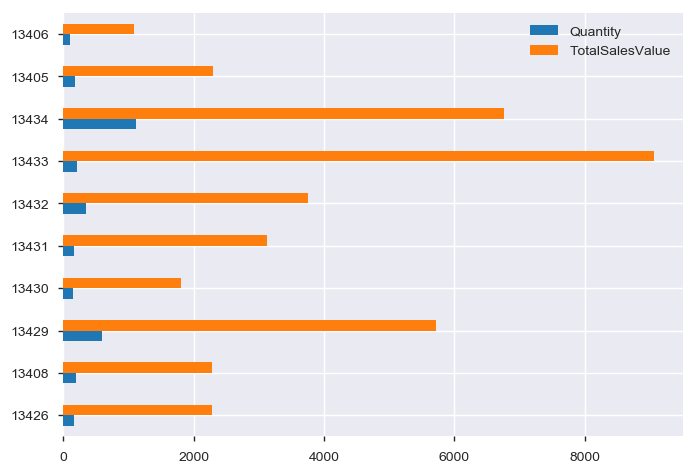

In [368]:
plt.figure(figsize=(16,6))
dataframe.sort_values(['SalesPersonID'], ascending=False).head(10).plot(kind="barh")
plt.show()

<Figure size 1600x600 with 0 Axes>

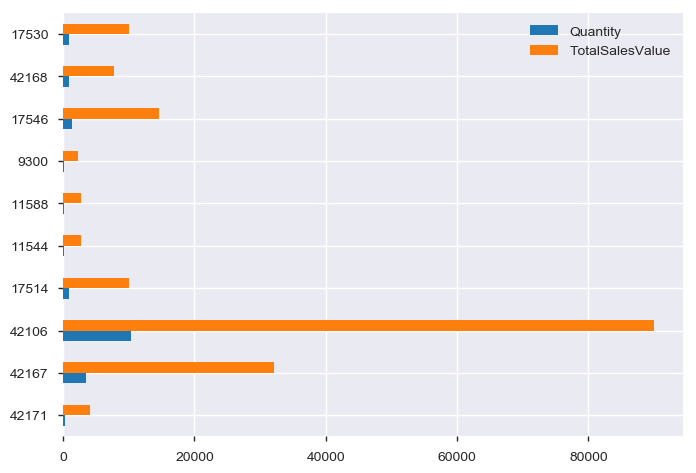

In [369]:
plt.figure(figsize=(16,6))
dataframe.sort_values(['ProductID'], ascending=False).head(10).plot(kind="barh")
plt.show()

<Figure size 1600x600 with 0 Axes>

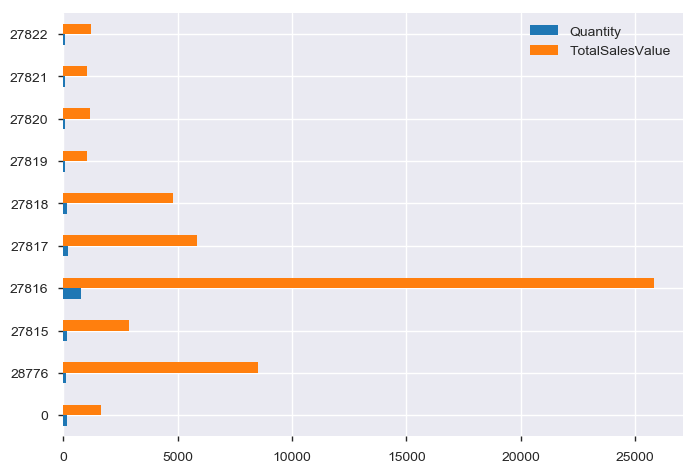

In [370]:
plt.figure(figsize=(16,6))
dataframe.sort_values(['Suspicious'], ascending=False).head(10).plot(kind="barh")
plt.show()

##### Checking missing Values:

In [371]:
import missingno as msno # Missing Data visualization

<Figure size 1600x600 with 0 Axes>

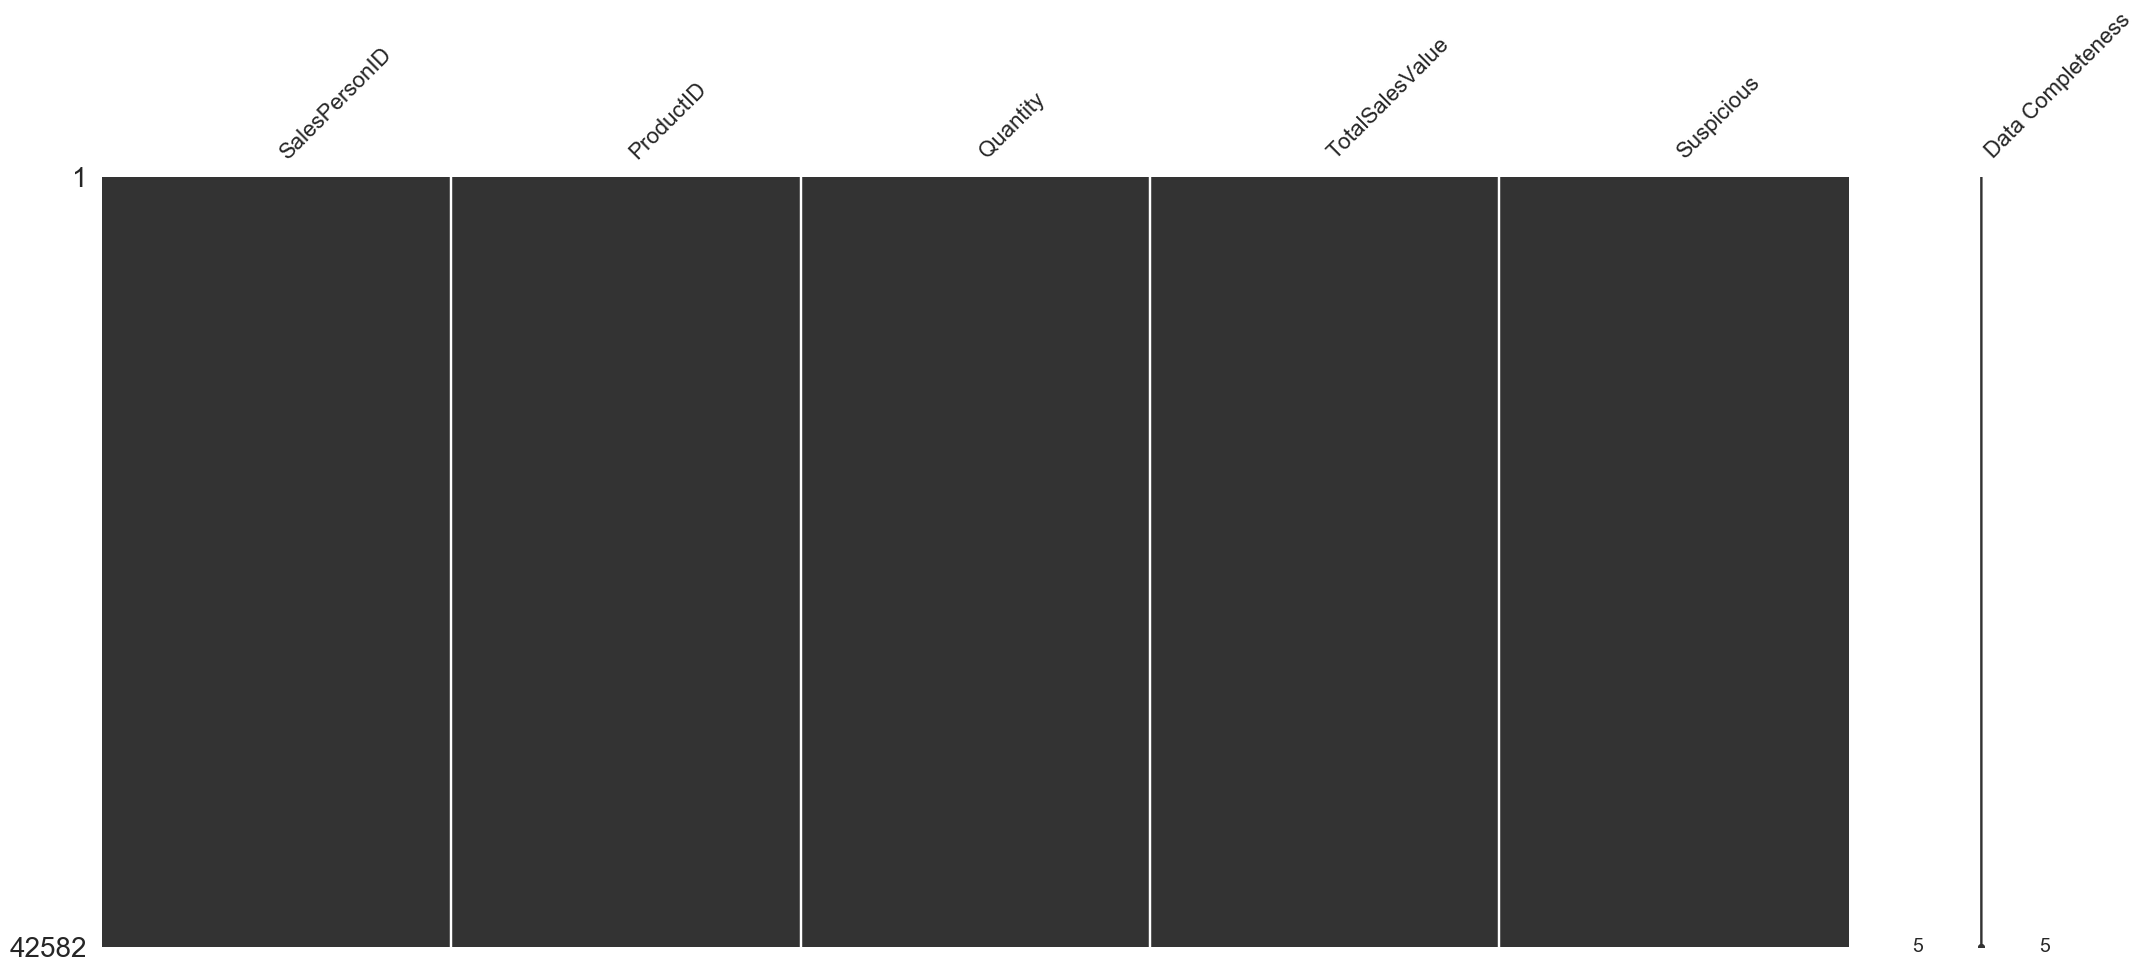

SalesPersonID has NO missing value!
ProductID has NO missing value!
Quantity has NO missing value!
TotalSalesValue has NO missing value!
Suspicious has NO missing value!


In [372]:
# Checking the missing values 
plt.figure(figsize=(16,6))
msno.matrix(dataframe,labels=True,color=(0.20,0.20,0.20))
plt.show()
for c in dataframe.columns:
    miss = dataframe[c].isnull().sum()
    if miss>0:
        print("{} has {} missing value(s)".format(c,miss))
    else:
        print("{} has NO missing value!".format(c))

<Figure size 10000x20000 with 0 Axes>

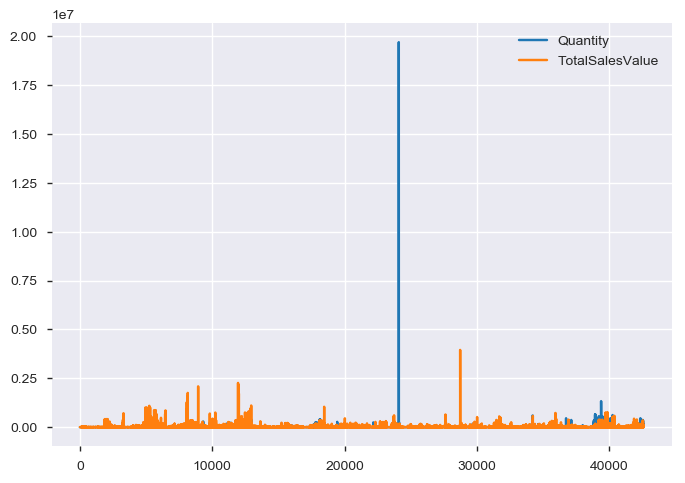

In [373]:
# Quantity vs Total Sales
plt.figure(figsize=(100,200))
dataframe.plot()
plt.show()

In [374]:
import seaborn as sns

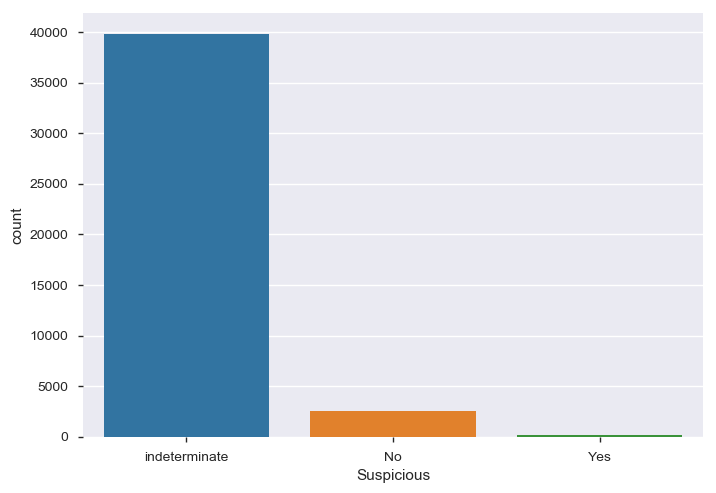

indeterminate    93.574750
No                6.000188
Yes               0.425062
Name: Suspicious, dtype: float64

In [375]:
#Counter plot for "Suspicious"
dataframe['Suspicious'].value_counts()
sns.countplot(x='Suspicious',data=dataframe)
plt.show()
(dataframe["Suspicious"].value_counts()/dataframe.shape[0]*100)

##### Top 10 Sales persons Transactions:

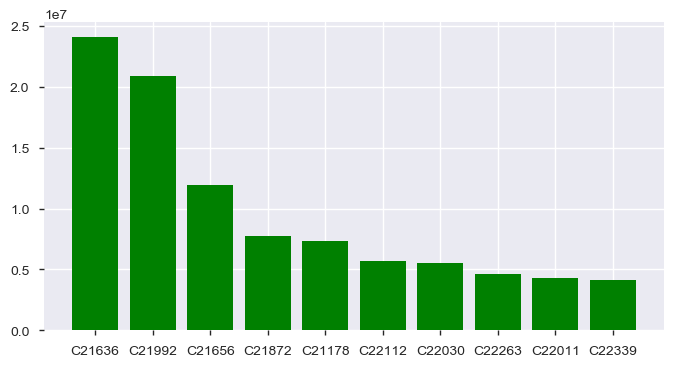

Top ten guys total contribution by quantity


13.948894548010024

In [380]:
#Top ten sales based on quantity
plt.figure(figsize=(8,4))
top_ten_salesid_quantity=dataframe.groupby(['SalesPersonID']).sum().sort_values(by='Quantity',ascending=False).head(10)
plt.bar(x=top_ten_salesid_quantity.index,height=top_ten_salesid_quantity['Quantity'],color='green')
plt.show()

#top ten guys total contribution by quantity
print("Top ten guys total contribution by quantity")
((top_ten_salesid_quantity['Quantity']/dataframe['TotalSalesValue'].sum())*100).sum() 

Comment: 
        Top ten guys contributed 13.948894548010024 percent to the total quantity sold.

In [377]:
pd.DataFrame(top_ten_salesid_quantity)

,Quantity,TotalSalesValue
SalesPersonID,,
C21636,24060951,15855820
C21992,20897797,2056895
C21656,11943852,5441680
C21872,7731866,16438165
C21178,7357299,26522900
C22112,5711293,1456425
C22030,5525254,20705860
C22263,4628186,7814675
C22011,4260588,1788435


##### Last 10 Sales persons Transactions:

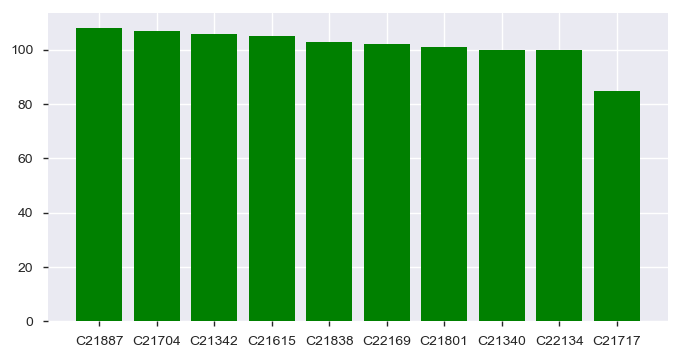

Last ten guys total contribution by quantity


0.00014734402037043685

In [172]:
#Last ten sales based on quantity
plt.figure(figsize=(8,4))
last_ten_salesid_quantity=dataframe.groupby(['SalesPersonID']).sum().sort_values(by='Quantity',ascending=False).tail(10)
plt.bar(x=last_ten_salesid_quantity.index,height=last_ten_salesid_quantity['Quantity'],color='green')
plt.show()

#bottom ten guys total contribution by quantity
print("Last ten guys total contribution by quantity")
((last_ten_salesid_quantity['Quantity']/dataframe['TotalSalesValue'].sum())*100).sum()

Comment: Top ten guys contributed 0.000147 percent to the total quantity sold.

In [381]:
pd.DataFrame(last_ten_salesid_quantity)

,Quantity,TotalSalesValue
SalesPersonID,,
C21887,108,1025
C21704,107,2430
C21342,106,2290
C21615,105,1660
C21838,103,1075
C22169,102,1120
C21801,101,1030
C21340,100,1230
C22134,100,1010


In [383]:
# Groupped total sales value by Prodcut Id
sal_prod_totalSal=dataframe[['ProductID','TotalSalesValue']]
plotting_group=sal_prod_totalSal.groupby('ProductID')
print(plotting_group.size().count())
print("**"*20)
print(plotting_group.size().head(15))
print("**"*20)

593
****************************************
ProductID
PR6112    169
PR6113     24
PR6114    130
PR6115    533
PR6116    315
PR6117    133
PR6118      8
PR6119     60
PR6120     17
PR6121     18
PR6122      2
PR6123     45
PR6124     38
PR6125     25
PR6126     27
dtype: int64
****************************************


In [384]:
#Sum of Total sales value by its product Id
total_sales=plotting_group.sum()
pd.DataFrame(total_sales).head(15).T

ProductID,PR6112,PR6113,PR6114,PR6115,PR6116,PR6117,PR6118,PR6119,PR6120,PR6121,PR6122,PR6123,PR6124,PR6125,PR6126
TotalSalesValue,1162050,121825,1155935,12118200,5104310,1661935,83275,524440,104045,432915,4985,854150,665590,146875,212825


In [385]:
# Groupped totalsales value by Sales Id
salesperson_totalsales = dataframe.groupby('SalesPersonID').mean()['TotalSalesValue']
pd.DataFrame(salesperson_totalsales).head(10)

,TotalSalesValue
SalesPersonID,
C21116,2408.000000
C21118,199196.000000
C21119,1168.750000
C21121,6159.687500
C21122,1865.357143
C21123,12335.000000
C21124,23590.757576
C21126,15167.500000
C21127,19312.500000


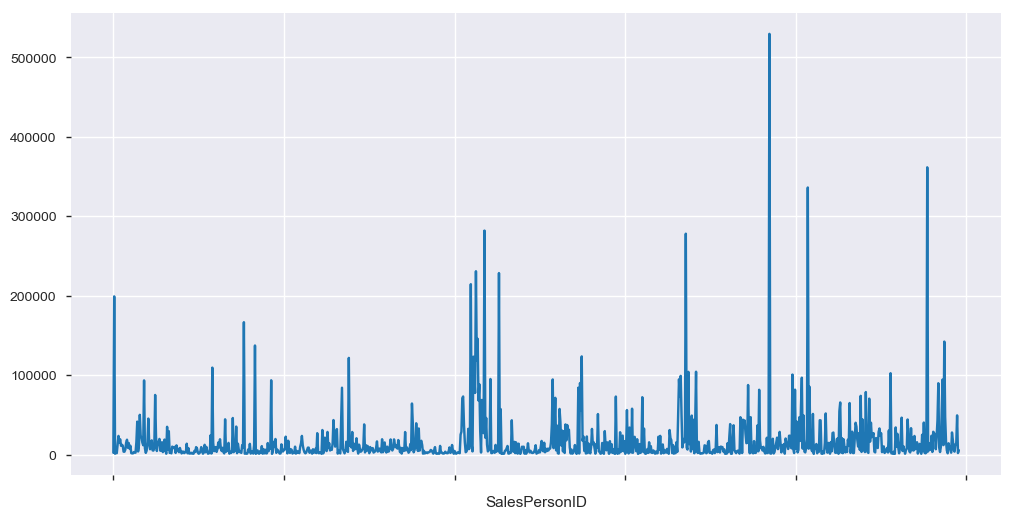

In [386]:
#Salesperson wise total sales
fig,axes = plt.subplots(figsize=(12,6))
revenue_plot = salesperson_totalsales.plot(kind='line') 

In [387]:
# Groupped total sales value by Sales Id
sales_quantity = dataframe.groupby('Suspicious').mean()['Quantity']
sales_quantity

Suspicious
No                13250.285323
Yes              137467.707182
indeterminate      3773.115118
Name: Quantity, dtype: float64

Text(0,0.5,'Quantity')

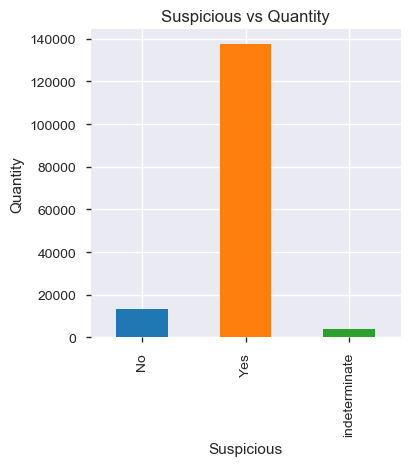

In [388]:
# Counter  plot for grouped sales quantity
fig, axes = plt.subplots(figsize=(4,4))
quantity_plot= sales_quantity.plot(kind='bar', title="Suspicious vs Quantity")
quantity_plot.set_xlabel('Suspicious')
quantity_plot.set_ylabel('Quantity')

In [389]:
#### Checking the sales break down by category
customes = dataframe [['SalesPersonID','Suspicious','Quantity']]
category_group = customes.groupby(['SalesPersonID','Suspicious']).sum()
category_group.unstack().T

SalesPersonID           C21116    C21118  C21119   C21121  C21122   C21123  \
         Suspicious                                                          
Quantity No              283.0  587465.0   166.0    140.0     NaN    100.0   
         Yes               NaN     110.0     NaN      NaN     NaN      NaN   
         indeterminate  1546.0  379364.0   304.0  16157.0  5965.0  30645.0   

SalesPersonID             C21124    C21126  C21127    C21128   ...     \
         Suspicious                                            ...      
Quantity No             169483.0     260.0   333.0     754.0   ...      
         Yes                 NaN       NaN     NaN    4583.0   ...      
         indeterminate   26167.0  186909.0   327.0  674547.0   ...      

SalesPersonID            C22336     C22337     C22339   C22340   C22341  \
         Suspicious                                                       
Quantity No                 NaN     1927.0   201294.0      NaN      NaN   
         Yes                NaN        NaN        NaN      NaN      NaN   
         indeterminate  60374.0  1384346.0  3959879.0  34677.0  17146.0   

SalesPersonID            C22342   C22343    C22344   C22347   C22348  
         Suspicious                                                   
Quantity No               106.0      NaN   94612.0      NaN    102.0  
         Yes                NaN      NaN    1245.0      NaN      NaN  
         indeterminate  94100.0  80834.0  220046.0  15468.0  26682.0  

[3 rows x 992 columns]

In [390]:
dataframe1=dataframe

In [391]:
dataframe1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42582 entries, 0 to 42581
Data columns (total 5 columns):
SalesPersonID      42582 non-null object
ProductID          42582 non-null object
Quantity           42582 non-null int64
TotalSalesValue    42582 non-null int64
Suspicious         42582 non-null object
dtypes: int64(2), object(3)
memory usage: 1.6+ MB


# Feature engineering

In [392]:
dataframe1['PricePerUnit']=dataframe1.TotalSalesValue/dataframe1.Quantity

In [393]:
dataframe1.head(5)

,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious,PricePerUnit
0,C21116,PR6112,182,1665,indeterminate,9.148352
1,C21116,PR6112,182,1740,indeterminate,9.560440
2,C21116,PR6253,101,1040,indeterminate,10.297030
3,C21116,PR6253,283,4495,No,15.883392
4,C21116,PR6294,108,1465,indeterminate,13.564815


In [394]:
dataframe1.keys()

Index(['SalesPersonID', 'ProductID', 'Quantity', 'TotalSalesValue',
       'Suspicious', 'PricePerUnit'],
      dtype='object')

In [395]:
def group_By_with_TwoColumns(df,dfCol1,dfCol2,dfCol3,joinCond): 
    data=pd.merge(df,pd.DataFrame(df.groupby([dfCol1,dfCol2]).mean()[dfCol3]).reset_index(),on=[dfCol1,dfCol2],how=joinCond)
    return data

In [396]:
def group_By_with_SingleColumns(df,dfCol1,dfCol2,joinCond): 
    data=pd.merge(df,pd.DataFrame(df.groupby([dfCol1]).mean()[dfCol2]).reset_index(),on=[dfCol1],how=joinCond)
    return data

In [397]:
def renaming_Column(df,ac1,rc2,ac3,rc4):
    data=df.rename(index=str,columns={ac1:rc2,ac3:rc4})
    return data

In [398]:
def diff_between_two_columns(df,col1,col2):
    data=df[col1]-df[col2]
    return data

In [399]:
dataframe1=group_By_with_TwoColumns(dataframe1,'SalesPersonID','ProductID','Quantity','left')
dataframe1=renaming_Column(dataframe1,"Quantity_y","Avg_Qty_ProdID","Quantity_x","Quantity")

In [400]:
dataframe1.keys()

Index(['SalesPersonID', 'ProductID', 'Quantity', 'TotalSalesValue',
       'Suspicious', 'PricePerUnit', 'Avg_Qty_ProdID'],
      dtype='object')

In [401]:
dataframe1=group_By_with_TwoColumns(dataframe1,'SalesPersonID','ProductID','TotalSalesValue','left')
dataframe1=renaming_Column(dataframe1,'TotalSalesValue_y','Avg_Tsale_prdID','TotalSalesValue_x',"TotalSalesValue")

In [402]:
dataframe1.keys()

Index(['SalesPersonID', 'ProductID', 'Quantity', 'TotalSalesValue',
       'Suspicious', 'PricePerUnit', 'Avg_Qty_ProdID', 'Avg_Tsale_prdID'],
      dtype='object')

In [403]:
dataframe1=group_By_with_TwoColumns(dataframe1,'SalesPersonID','ProductID','PricePerUnit','left')
dataframe1=renaming_Column(dataframe1,'PricePerUnit_y','Avg_PPerUnit_prdID','PricePerUnit_x','PricePerUnit')

In [404]:
dataframe1.keys()

Index(['SalesPersonID', 'ProductID', 'Quantity', 'TotalSalesValue',
       'Suspicious', 'PricePerUnit', 'Avg_Qty_ProdID', 'Avg_Tsale_prdID',
       'Avg_PPerUnit_prdID'],
      dtype='object')

In [405]:
dataframe1=group_By_with_SingleColumns(dataframe1,'SalesPersonID','Quantity','left')
dataframe1=renaming_Column(dataframe1,'Quantity_y','Avg_Qty','Quantity_x','Quantity')

In [406]:
dataframe1.keys()

Index(['SalesPersonID', 'ProductID', 'Quantity', 'TotalSalesValue',
       'Suspicious', 'PricePerUnit', 'Avg_Qty_ProdID', 'Avg_Tsale_prdID',
       'Avg_PPerUnit_prdID', 'Avg_Qty'],
      dtype='object')

In [407]:
dataframe1=group_By_with_SingleColumns(dataframe1,'SalesPersonID','TotalSalesValue','left')
dataframe1=renaming_Column(dataframe1,'TotalSalesValue_y','Avg_TSale','TotalSalesValue_x','TotalSalesValue')

In [408]:
dataframe.keys()

Index(['SalesPersonID', 'ProductID', 'Quantity', 'TotalSalesValue',
       'Suspicious', 'PricePerUnit'],
      dtype='object')

In [409]:
dataframe1=group_By_with_SingleColumns(dataframe1,'SalesPersonID','PricePerUnit','left')
dataframe1=renaming_Column(dataframe1,'PricePerUnit_y','Avg_PPerUnit','PricePerUnit_x','PricePerUnit')

In [410]:
dataframe1=group_By_with_SingleColumns(dataframe1,'ProductID','Quantity','left')
dataframe1=renaming_Column(dataframe1,'Quantity_y','Avg_Qty_pProdID','Quantity_x','Quantity')

In [411]:
dataframe1.keys()

Index(['SalesPersonID', 'ProductID', 'Quantity', 'TotalSalesValue',
       'Suspicious', 'PricePerUnit', 'Avg_Qty_ProdID', 'Avg_Tsale_prdID',
       'Avg_PPerUnit_prdID', 'Avg_Qty', 'Avg_TSale', 'Avg_PPerUnit',
       'Avg_Qty_pProdID'],
      dtype='object')

In [412]:
dataframe1=group_By_with_SingleColumns(dataframe1,'ProductID','TotalSalesValue','left')
dataframe1=renaming_Column(dataframe1,'TotalSalesValue_y','Avg_TsaleVal_ProdID','TotalSalesValue_x','TotalSalesValue')

In [413]:
dataframe1=group_By_with_SingleColumns(dataframe1,'ProductID','PricePerUnit','left')
dataframe1=renaming_Column(dataframe1,'PricePerUnit_y','Avg_PPerUnit_ProdID','PricePerUnit_x','PricePerUnit')

In [414]:
dataframe1.keys()

Index(['SalesPersonID', 'ProductID', 'Quantity', 'TotalSalesValue',
       'Suspicious', 'PricePerUnit', 'Avg_Qty_ProdID', 'Avg_Tsale_prdID',
       'Avg_PPerUnit_prdID', 'Avg_Qty', 'Avg_TSale', 'Avg_PPerUnit',
       'Avg_Qty_pProdID', 'Avg_TsaleVal_ProdID', 'Avg_PPerUnit_ProdID'],
      dtype='object')

In [415]:
dataframe1.head()

,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious,PricePerUnit,Avg_Qty_ProdID,Avg_Tsale_prdID,Avg_PPerUnit_prdID,Avg_Qty,Avg_TSale,Avg_PPerUnit,Avg_Qty_pProdID,Avg_TsaleVal_ProdID,Avg_PPerUnit_ProdID
0,C21116,PR6112,182,1665,indeterminate,9.148352,182.0,1715.0,9.423077,182.9,2408.0,12.592662,591.650888,6876.035503,14.164825
1,C21116,PR6112,182,1740,indeterminate,9.560440,182.0,1715.0,9.423077,182.9,2408.0,12.592662,591.650888,6876.035503,14.164825
2,C21116,PR6253,101,1040,indeterminate,10.297030,227.0,3327.5,13.215452,182.9,2408.0,12.592662,471.563320,5612.323552,16.161482
3,C21116,PR6253,283,4495,No,15.883392,227.0,3327.5,13.215452,182.9,2408.0,12.592662,471.563320,5612.323552,16.161482
4,C21116,PR6294,108,1465,indeterminate,13.564815,112.5,1662.5,14.731125,182.9,2408.0,12.592662,224.248227,5203.262411,20.898267


In [416]:
len(dataframe1.columns)

15

##### Looking for NaN's

In [417]:
#return a formatted percentage from a fraction
def percentage(numerator, denomenator):
    
    if type(numerator) == pd.core.series.Series:
        return (numerator/denomenator*100).map('{:.1f}%'.format)
    
    elif type(numerator) == int or type(numerator) == float:
        return '{:.1f}%'.format(float(numerator)/float(denomenator)*100) 
    
    else:
        print("check type")

In [418]:
#Get percentage by variable of values which are not NaN
percentage(dataframe1.count()-1, dataframe1.shape[0]-1)

SalesPersonID          100.0%
ProductID              100.0%
Quantity               100.0%
TotalSalesValue        100.0%
Suspicious             100.0%
PricePerUnit           100.0%
Avg_Qty_ProdID         100.0%
Avg_Tsale_prdID        100.0%
Avg_PPerUnit_prdID     100.0%
Avg_Qty                100.0%
Avg_TSale              100.0%
Avg_PPerUnit           100.0%
Avg_Qty_pProdID        100.0%
Avg_TsaleVal_ProdID    100.0%
Avg_PPerUnit_ProdID    100.0%
dtype: object

In [420]:
#df=sales[['SalesPersonID','ProductID','Quantity','TotalSalesValue','Suspicious','PricePerUnit']]
df=dataframe1.iloc[:,0:6]

df.head()

,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious,PricePerUnit
0,C21116,PR6112,182,1665,indeterminate,9.148352
1,C21116,PR6112,182,1740,indeterminate,9.560440
2,C21116,PR6253,101,1040,indeterminate,10.297030
3,C21116,PR6253,283,4495,No,15.883392
4,C21116,PR6294,108,1465,indeterminate,13.564815


In [421]:
df['diff_Avg_Qty_ProdID']=diff_between_two_columns(dataframe1,'Quantity','Avg_Qty_ProdID')
df['diff_Avg_Tsale_ProdID']=diff_between_two_columns(dataframe1,'TotalSalesValue','Avg_Tsale_prdID') 
df['diff_Avg_PPerUnit_ProdID']=diff_between_two_columns(dataframe1,'PricePerUnit','Avg_PPerUnit_prdID')

In [422]:
df['diff_Avg_Qty']=diff_between_two_columns(dataframe1,'Quantity','Avg_Qty') 
df['diff_Avg_TSale']=diff_between_two_columns(dataframe1,'TotalSalesValue','Avg_TSale')
df['diff_Avg_PPerUnit']= diff_between_two_columns(dataframe1,'PricePerUnit','Avg_PPerUnit') 

In [423]:
df['diff_Avg_Qty_pProdID']=diff_between_two_columns(dataframe1,'Quantity','Avg_Qty_pProdID')  
df['diff_Avg_TsaleVal_ProdID']=diff_between_two_columns(dataframe1,'TotalSalesValue','Avg_TsaleVal_ProdID')
df['diff_Avg_PPerUnit_ProdID']=diff_between_two_columns(dataframe1,'PricePerUnit','Avg_PPerUnit_ProdID')

In [424]:
len(df.columns)

14

In [425]:
df.head(3)

,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious,PricePerUnit,diff_Avg_Qty_ProdID,diff_Avg_Tsale_ProdID,diff_Avg_PPerUnit_ProdID,diff_Avg_Qty,diff_Avg_TSale,diff_Avg_PPerUnit,diff_Avg_Qty_pProdID,diff_Avg_TsaleVal_ProdID
0,C21116,PR6112,182,1665,indeterminate,9.148352,0.0,-50.0,-5.016473,-0.9,-743.0,-3.444311,-409.650888,-5211.035503
1,C21116,PR6112,182,1740,indeterminate,9.560440,0.0,25.0,-4.604385,-0.9,-668.0,-3.032223,-409.650888,-5136.035503
2,C21116,PR6253,101,1040,indeterminate,10.297030,-126.0,-2287.5,-5.864452,-81.9,-1368.0,-2.295633,-370.563320,-4572.323552


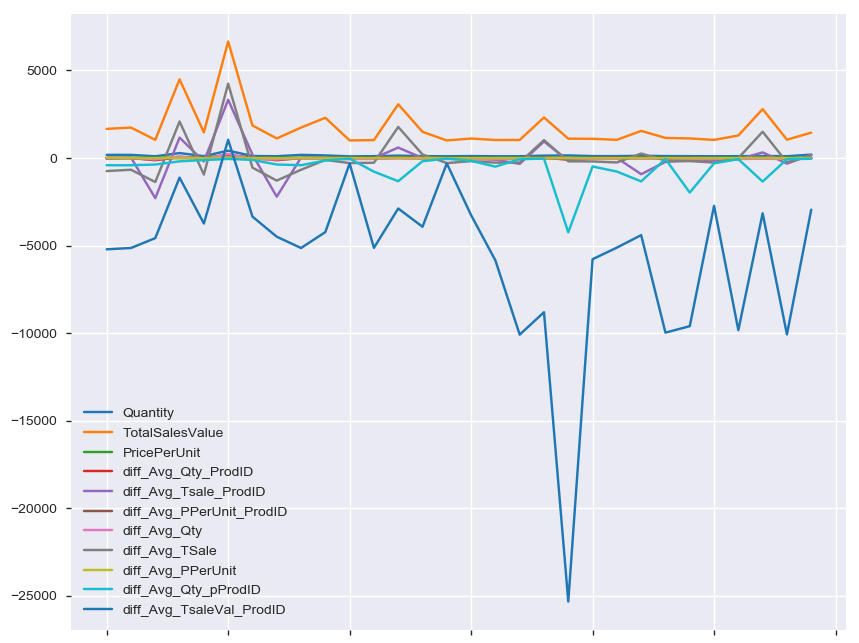

In [427]:
# Line plot
df.head(30).plot(kind='line', figsize=(10,8))
plt.show()

In [428]:
df.isnull().sum().sum() #Checking null values

0

In [429]:
df=df.drop(axis=1,columns=['ProductID','SalesPersonID']) #Dropped Prodcut Id and SalesPersonID columns
len(df.columns) #Checking number of columns after dropping two columns

12

In [430]:
# Re arranging the columns
df = df[['Quantity','TotalSalesValue','PricePerUnit',
       'diff_Avg_Qty_ProdID', 'diff_Avg_Tsale_ProdID',
       'diff_Avg_PPerUnit_ProdID', 'diff_Avg_Qty', 'diff_Avg_TSale',
       'diff_Avg_PPerUnit', 'diff_Avg_TsaleVal_ProdID',
       'diff_Avg_Qty_pProdID','Suspicious']]

In [431]:
#splitting the dataset into the source variables (independant variables) and the target variable (dependant variable)
X = df.iloc[:,0:11] #all columns except the last one
X.head()

,Quantity,TotalSalesValue,PricePerUnit,diff_Avg_Qty_ProdID,diff_Avg_Tsale_ProdID,diff_Avg_PPerUnit_ProdID,diff_Avg_Qty,diff_Avg_TSale,diff_Avg_PPerUnit,diff_Avg_TsaleVal_ProdID,diff_Avg_Qty_pProdID
0,182,1665,9.148352,0.0,-50.0,-5.016473,-0.9,-743.0,-3.444311,-5211.035503,-409.650888
1,182,1740,9.560440,0.0,25.0,-4.604385,-0.9,-668.0,-3.032223,-5136.035503,-409.650888
2,101,1040,10.297030,-126.0,-2287.5,-5.864452,-81.9,-1368.0,-2.295633,-4572.323552,-370.563320
3,283,4495,15.883392,56.0,1167.5,-0.278089,100.1,2087.0,3.290730,-1117.323552,-188.563320
4,108,1465,13.564815,-4.5,-197.5,-7.333452,-74.9,-943.0,0.972152,-3738.262411,-116.248227


In [432]:
y =df.iloc[:,11] #only the last column
y.head()

0    indeterminate
1    indeterminate
2    indeterminate
3               No
4    indeterminate
Name: Suspicious, dtype: object

In [459]:
df.dtypes

Quantity                      int64
TotalSalesValue               int64
PricePerUnit                float64
diff_Avg_Qty_ProdID         float64
diff_Avg_Tsale_ProdID       float64
diff_Avg_PPerUnit_ProdID    float64
diff_Avg_Qty                float64
diff_Avg_TSale              float64
diff_Avg_PPerUnit           float64
diff_Avg_TsaleVal_ProdID    float64
diff_Avg_Qty_pProdID        float64
Suspicious                   object
dtype: object

In [460]:
# split X and y into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val =train_test_split(X,y,test_size=0.25,random_state=0)

In [461]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(31936, 11)
(10646, 11)
(31936,)
(10646,)


In [462]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X_train=s.fit_transform(X_train)
X_val=s.transform(X_val)

In [480]:
X_train

array([[ 0.07125836,  0.3271307 , -0.15176483, ..., -0.07315224,
         0.31304232,  0.08218067],
       [-0.04223115, -0.10682881,  0.11231935, ...,  0.05004872,
        -0.23976697, -0.00533553],
       [-0.04456592, -0.24530792, -0.06997684, ..., -0.05508705,
        -0.00702193, -0.00159993],
       ...,
       [-0.04441501, -0.21025093,  0.12099676, ...,  0.09009339,
        -0.0268375 , -0.0305279 ],
       [-0.04453929, -0.18552819,  0.32839351, ...,  0.28559247,
         0.0260369 , -0.00157204],
       [-0.04374032, -0.23680203, -0.09382096, ...,  0.03037789,
        -0.09857792, -0.00504292]])

##### Random Forest Classifier:

In [463]:
from sklearn.ensemble import RandomForestClassifier

In [464]:
clf = RandomForestClassifier(n_estimators=10,max_depth=8)
clf.fit(X=X_train, y=y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

##### Prediction on Validation and Train data:

In [465]:
y_pred_val = clf.predict(X_val)

In [466]:
y_pred_train = clf.predict(X_train)

##### Accuracies of RF clssifier on Validation and Train data:

In [489]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score


print('Accuracy score on validation data:', accuracy_score(y_val,y_pred_val))

print('Accuracy score on Train data:' ,accuracy_score(y_train,y_pred_train))

Accuracy score on validation data: 0.9472102198008642
Accuracy score on Train data: 0.951809869739479


##### Recall score of RF clssifier on Validation and Train data:

In [490]:
print('Recall score on validation data:', recall_score(y_val,y_pred_val,pos_label=1,average='micro'))
print('Recall score on Train data:',recall_score(y_train,y_pred_train,pos_label=1,average='micro'))

Recall score on validation data: 0.9472102198008642
Recall score on Train data: 0.951809869739479


In [474]:
clf.feature_importances_

array([0.0559354 , 0.08228758, 0.08660691, 0.03219064, 0.04829394,
       0.14682169, 0.03873142, 0.0775711 , 0.05510437, 0.24033657,
       0.13612038])

##### Bagging Classifier:

In [491]:
from sklearn.ensemble import BaggingClassifier

In [492]:
clfB = BaggingClassifier(n_estimators=10)
clfB.fit(X=X_train, y=y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

##### Prediction on Validation and Train data:

In [493]:
y_pred_val = clfB.predict(X_val)
y_pred_train = clfB.predict(X_train)
#print(accuracy_score(y_val,y_pred))

##### Accuracies of Bagging clssifier on Validation and Train data:

In [494]:
print('Accuracy score on validation data:', accuracy_score(y_val,y_pred_val))

print('Accuracy score on Train data:' ,accuracy_score(y_train,y_pred_train))

Accuracy score on validation data: 0.9569791470975014
Accuracy score on Train data: 0.9950839178356713


##### Recall score of Bagging clssifier on Validation and Train data:

In [496]:
print('Recall score on validation data:', recall_score(y_val,y_pred_val,pos_label=1,average='micro'))
print('Recall score on Train data:',recall_score(y_train,y_pred_train,pos_label=1,average='micro'))

Recall score on validation data: 0.9569791470975014
Recall score on Train data: 0.9950839178356713


In [484]:
print(recall_score(y_val,y_pred,pos_label=1,average='micro'))

0.958200263009581


In [497]:
X_val.shape

(10646, 11)

### Testing on UnseenData:

#####  Provided Test Dataset:

In [501]:
UnseenData=pd.read_csv("Test.csv",na_values=["?",","])

In [502]:
UnseenData.head(3)

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue
0,Rep70101,C21844,PR6483,102,1115
1,Rep70102,C21844,PR6251,102,1050
2,Rep70103,C21844,PR6253,344,3490


In [503]:
UnseenData.keys()

Index(['ReportID', 'SalesPersonID', 'ProductID', 'Quantity',
       'TotalSalesValue'],
      dtype='object')

In [504]:
UnseenData['PricePerUnit']=UnseenData.TotalSalesValue/UnseenData.Quantity

In [505]:
UnseenData=group_By_with_TwoColumns(UnseenData,'SalesPersonID','ProductID','Quantity','left')
UnseenData=renaming_Column(UnseenData,"Quantity_y","Avg_Qty_ProdID","Quantity_x","Quantity")

In [506]:
UnseenData=group_By_with_TwoColumns(UnseenData,'SalesPersonID','ProductID','TotalSalesValue','left')
UnseenData=renaming_Column(UnseenData,'TotalSalesValue_y','Avg_Tsale_prdID','TotalSalesValue_x',"TotalSalesValue")

In [507]:
UnseenData=group_By_with_TwoColumns(UnseenData,'SalesPersonID','ProductID','PricePerUnit','left')
UnseenData=renaming_Column(UnseenData,'PricePerUnit_y','Avg_PPerUnit_prdID','PricePerUnit_x','PricePerUnit')

In [508]:
UnseenData=group_By_with_SingleColumns(UnseenData,'SalesPersonID','Quantity','left')
UnseenData=renaming_Column(UnseenData,'Quantity_y','Avg_Qty','Quantity_x','Quantity')

In [509]:
UnseenData=group_By_with_SingleColumns(UnseenData,'SalesPersonID','TotalSalesValue','left')
UnseenData=renaming_Column(UnseenData,'TotalSalesValue_y','Avg_TSale','TotalSalesValue_x','TotalSalesValue')

In [510]:
UnseenData=group_By_with_SingleColumns(UnseenData,'SalesPersonID','PricePerUnit','left')
UnseenData=renaming_Column(UnseenData,'PricePerUnit_y','Avg_PPerUnit','PricePerUnit_x','PricePerUnit')

In [511]:
UnseenData=group_By_with_SingleColumns(UnseenData,'ProductID','Quantity','left')
UnseenData=renaming_Column(UnseenData,'Quantity_y','Avg_Qty_pProdID','Quantity_x','Quantity')

In [512]:
UnseenData=group_By_with_SingleColumns(UnseenData,'ProductID','TotalSalesValue','left')
UnseenData=renaming_Column(UnseenData,'TotalSalesValue_y','Avg_TsaleVal_ProdID','TotalSalesValue_x','TotalSalesValue')

In [513]:
UnseenData=group_By_with_SingleColumns(UnseenData,'ProductID','PricePerUnit','left')
UnseenData=renaming_Column(UnseenData,'PricePerUnit_y','Avg_PPerUnit_ProdID','PricePerUnit_x','PricePerUnit')

In [514]:
UnseenData.head()

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,PricePerUnit,Avg_Qty_ProdID,Avg_Tsale_prdID,Avg_PPerUnit_prdID,Avg_Qty,Avg_TSale,Avg_PPerUnit,Avg_Qty_pProdID,Avg_TsaleVal_ProdID,Avg_PPerUnit_ProdID
0,Rep70101,C21844,PR6483,102,1115,10.931373,102.0,1115.0,10.931373,147.3,1422.0,10.051409,192.702128,1840.106383,9.589537
1,Rep70102,C21844,PR6251,102,1050,10.294118,102.0,1050.0,10.294118,147.3,1422.0,10.051409,387.523077,3268.692308,10.807918
2,Rep70103,C21844,PR6253,344,3490,10.145349,225.5,2252.5,9.815665,147.3,1422.0,10.051409,729.142384,5101.100993,12.240047
3,Rep70104,C21844,PR6378,108,1095,10.138889,108.0,1095.0,10.138889,147.3,1422.0,10.051409,130.835443,2788.544304,20.299865
4,Rep70105,C21844,PR6463,146,1055,7.226027,155.8,1071.0,7.159729,147.3,1422.0,10.051409,204.454545,1558.636364,8.386834


In [515]:
UnseenData.shape

(9135, 15)

In [516]:
df_UnseenData=UnseenData.iloc[:,0:6]

df_UnseenData.head()

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,PricePerUnit
0,Rep70101,C21844,PR6483,102,1115,10.931373
1,Rep70102,C21844,PR6251,102,1050,10.294118
2,Rep70103,C21844,PR6253,344,3490,10.145349
3,Rep70104,C21844,PR6378,108,1095,10.138889
4,Rep70105,C21844,PR6463,146,1055,7.226027


In [517]:
df_UnseenData['diff_Avg_Qty_ProdID']=diff_between_two_columns(UnseenData,'Quantity','Avg_Qty_ProdID')
df_UnseenData['diff_Avg_Tsale_ProdID']=diff_between_two_columns(UnseenData,'TotalSalesValue','Avg_Tsale_prdID') 
df_UnseenData['diff_Avg_PPerUnit_ProdID']=diff_between_two_columns(UnseenData,'PricePerUnit','Avg_PPerUnit_prdID')

In [518]:
df_UnseenData['diff_Avg_Qty']=diff_between_two_columns(UnseenData,'Quantity','Avg_Qty') 
df_UnseenData['diff_Avg_TSale']=diff_between_two_columns(UnseenData,'TotalSalesValue','Avg_TSale')
df_UnseenData['diff_Avg_PPerUnit']= diff_between_two_columns(UnseenData,'PricePerUnit','Avg_PPerUnit')

In [519]:
df_UnseenData['diff_Avg_Qty_pProdID']=diff_between_two_columns(UnseenData,'Quantity','Avg_Qty_pProdID')  
df_UnseenData['diff_Avg_TsaleVal_ProdID']=diff_between_two_columns(UnseenData,'TotalSalesValue','Avg_TsaleVal_ProdID')
df_UnseenData['diff_Avg_PPerUnit_ProdID']=diff_between_two_columns(UnseenData,'PricePerUnit','Avg_PPerUnit_ProdID')

In [520]:
len(df_UnseenData.columns)

14

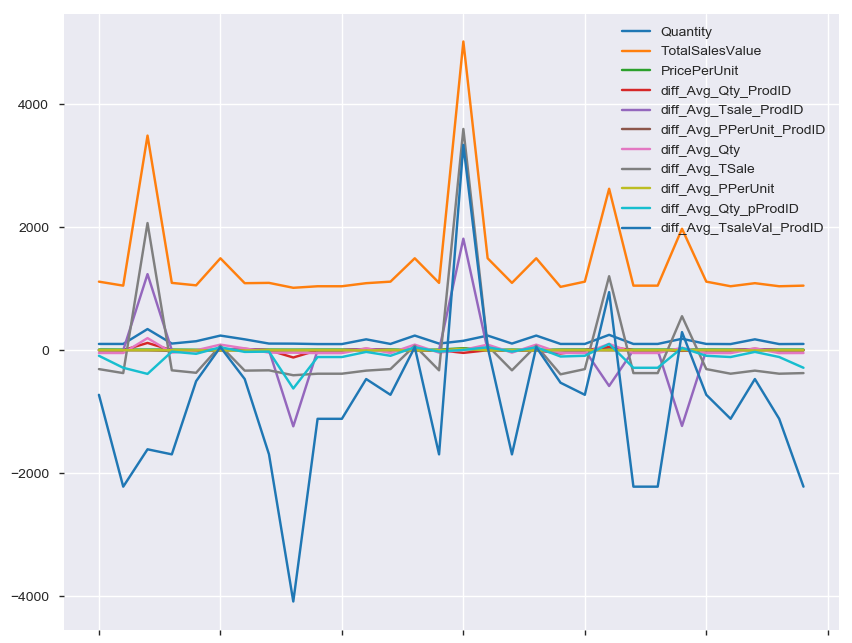

In [522]:
# Line plot
df_UnseenData.head(30).plot(kind='line', figsize=(10,8))
plt.show()

<Figure size 1600x600 with 0 Axes>

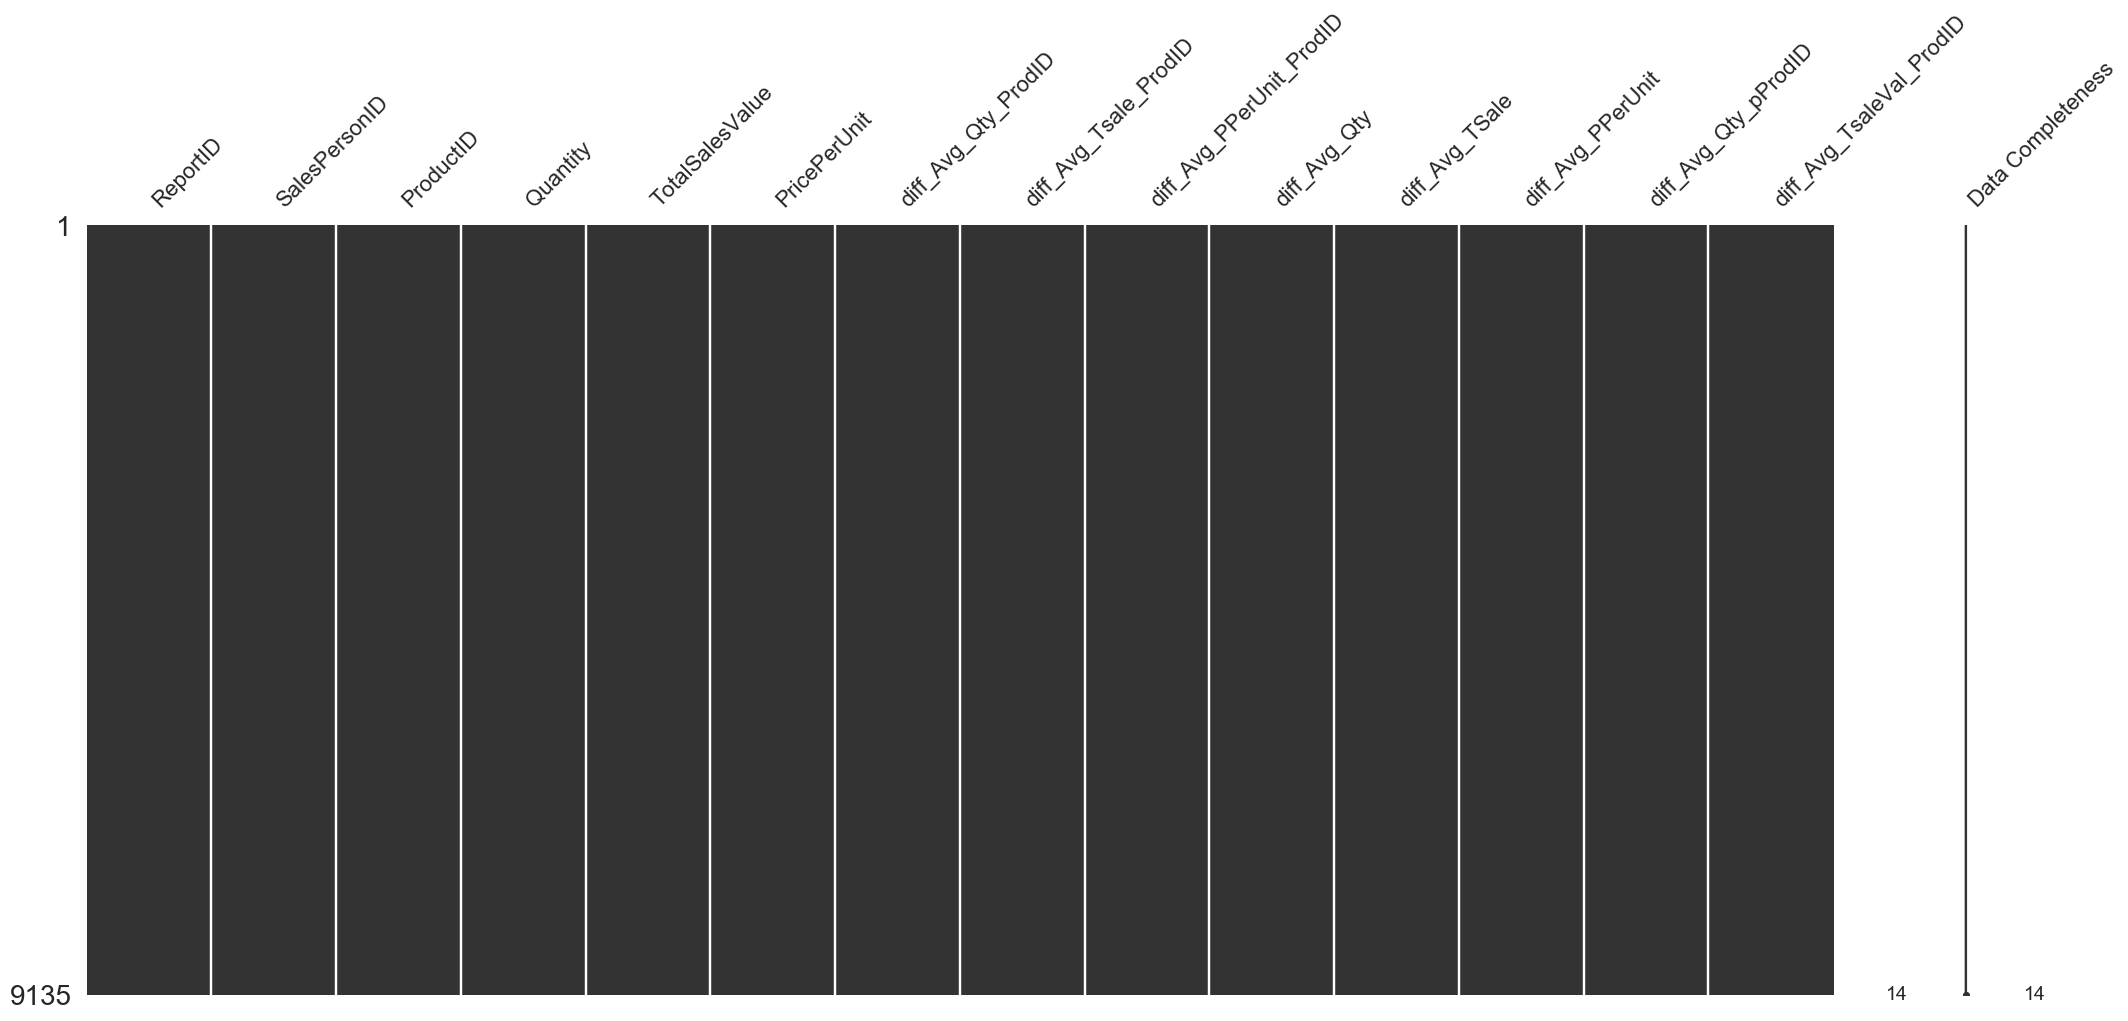

ReportID has NO missing value!
SalesPersonID has NO missing value!
ProductID has NO missing value!
Quantity has NO missing value!
TotalSalesValue has NO missing value!
PricePerUnit has NO missing value!
diff_Avg_Qty_ProdID has NO missing value!
diff_Avg_Tsale_ProdID has NO missing value!
diff_Avg_PPerUnit_ProdID has NO missing value!
diff_Avg_Qty has NO missing value!
diff_Avg_TSale has NO missing value!
diff_Avg_PPerUnit has NO missing value!
diff_Avg_Qty_pProdID has NO missing value!
diff_Avg_TsaleVal_ProdID has NO missing value!


In [523]:
# Checking the missing values 
plt.figure(figsize=(16,6))
msno.matrix(df_UnseenData,labels=True,color=(0.20,0.20,0.20))
plt.show()
for c in df_UnseenData.columns:
    miss = df_UnseenData[c].isnull().sum()
    if miss>0:
        print("{} has {} missing value(s)".format(c,miss))
    else:
        print("{} has NO missing value!".format(c))

In [524]:
df_UnseenData.isnull().sum().sum() #Checking null values

0

In [525]:
df_UnseenData=df_UnseenData.drop(axis=1,columns=['ReportID','ProductID','SalesPersonID']) #Dropped Prodcut Id and SalesPersonID columns
len(df_UnseenData.columns) #Checking number of columns after dropping two columns  #'ReportID',

11

In [526]:
df_UnseenData.keys()

Index(['Quantity', 'TotalSalesValue', 'PricePerUnit', 'diff_Avg_Qty_ProdID',
       'diff_Avg_Tsale_ProdID', 'diff_Avg_PPerUnit_ProdID', 'diff_Avg_Qty',
       'diff_Avg_TSale', 'diff_Avg_PPerUnit', 'diff_Avg_Qty_pProdID',
       'diff_Avg_TsaleVal_ProdID'],
      dtype='object')

In [527]:
df_UnseenData.dtypes

Quantity                      int64
TotalSalesValue               int64
PricePerUnit                float64
diff_Avg_Qty_ProdID         float64
diff_Avg_Tsale_ProdID       float64
diff_Avg_PPerUnit_ProdID    float64
diff_Avg_Qty                float64
diff_Avg_TSale              float64
diff_Avg_PPerUnit           float64
diff_Avg_Qty_pProdID        float64
diff_Avg_TsaleVal_ProdID    float64
dtype: object

##### Prediction on Unseen Data with RF:

In [268]:
Y_UnseenData_pred_RF = clf.predict(df_UnseenData)

In [269]:
Y_UnseenData_pred_RF.shape

(9135,)

##### Saving results .csv file for Actual Scores:

In [138]:
test_result_USD_RF = pd.DataFrame(Y_UnseenData_pred_RF,columns = ['Suspicious'])
result=test_result_USD_RF.Suspicious.replace({'indeterminate':3,'Yes':1,'No':2})

In [139]:
result.to_csv('samplesubmission_USD_RF.csv', sep=',')

##### Prediction on Unseen Data with Bagging Classifier:

In [140]:
Y_UnseenData_pred_BG = clfB.predict(df_UnseenData)

In [141]:
Y_UnseenData_pred_BG.shape

(9135,)

##### Saving results .csv file for Actual Scores:

In [142]:
test_result_USD_BG = pd.DataFrame(Y_UnseenData_pred_BG,columns = ['Suspicious'])
result=test_result_USD_BG.Suspicious.replace({'indeterminate':3,'Yes':1,'No':2})

In [143]:
result.to_csv('samplesubmission_USD_BG.csv', sep=',')

#********************#

### Clustering:

In [555]:
from sklearn.preprocessing import scale
# import KMeans
from sklearn.cluster import KMeans

In [556]:
data_clustering = df[['Quantity','TotalSalesValue']]

In [557]:
data_clustering = scale(data_clustering)

In [558]:
#data_clustering = X_train

In [560]:
data_clustering

array([[-0.048081  , -0.24252005],
       [-0.048081  , -0.24126945],
       [-0.04890472, -0.25294171],
       ...,
       [-0.03537953, -0.20400159],
       [ 0.04962576,  0.10272873],
       [ 0.04308689,  0.06579436]])

In [561]:
sse = []
for i in range(2,10):
    # create kmeans object
    kmeans = kmeans = KMeans(init='k-means++', n_clusters=i, n_init=10)
    # fit kmeans object to data
    kmeans.fit(data_clustering)
    # print location of clusters learned by kmeans object
#     print(kmeans.cluster_centers_)
    # save new clusters for chart
    sse.append(kmeans.inertia_)

In [541]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly
import plotly.offline as pyoff
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
import squarify # for tree maps
%matplotlib inline

In [562]:
x=list(range(2,10))
y=sse
data = [go.Scatter(x=x, # number of clusters
                   y=y, # sum of squared errors
                   text = [str(i) for i in (zip(x,y))], # text to display on hover
                   textposition = 'top center',
                   line = dict(color = ('rgb(205, 12, 24)')) # line color
                  )]

layout = go.Layout(title ='Scree plot (Sum of Squared errors)')
fig = go.Figure(data=data,layout=layout)
iplot(fig)

In [543]:
kmeans = KMeans(n_clusters=8)
# fit kmeans object to data
kmeans.fit(data_clustering)
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.predict(data_clustering) # read what fit_predict does

[[-3.70796756e-02 -1.78566574e-01]
 [ 2.00368210e+02  2.01181026e+00]
 [ 4.98088313e-01  2.55902245e+00]
 [ 1.04207598e+00  1.38666543e+01]
 [ 1.59566629e-01  6.98578659e-01]
 [ 1.13526347e+00  3.05791390e+01]
 [-4.63725589e-02  6.56610619e+01]
 [ 9.44680828e-01  5.87198434e+00]]


In [544]:
np.unique(y_km)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [545]:
dataframe1['Cluster_Centers'] = y_km

In [546]:
colors_clusters = dataframe1.Cluster_Centers

In [547]:
colors_clusters = colors_clusters.replace(to_replace=[0,1,2,3,4],value = ['rgb(170, 5, 5)',
                                'rgb(106, 12, 11)',
                                'rgb(185, 125, 16)',
                                'rgb (251, 202, 3)',
                                'rgb(103, 199, 235)'])

In [548]:
dataframe1.colors_clusters = colors_clusters

C:\Users\ANEEL\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [549]:
dataframe1.to_csv("data_with_clusters.csv",index=False)

In [550]:
dataframe1.head(3)

,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious,PricePerUnit,Avg_Qty_ProdID,Avg_Tsale_prdID,Avg_PPerUnit_prdID,Avg_Qty,Avg_TSale,Avg_PPerUnit,Avg_Qty_pProdID,Avg_TsaleVal_ProdID,Avg_PPerUnit_ProdID,Cluster_Centers
0,C21116,PR6112,182,1665,indeterminate,9.148352,182.0,1715.0,9.423077,182.9,2408.0,12.592662,591.650888,6876.035503,14.164825,0
1,C21116,PR6112,182,1740,indeterminate,9.560440,182.0,1715.0,9.423077,182.9,2408.0,12.592662,591.650888,6876.035503,14.164825,0
2,C21116,PR6253,101,1040,indeterminate,10.297030,227.0,3327.5,13.215452,182.9,2408.0,12.592662,471.563320,5612.323552,16.161482,0


In [553]:
def plot_bar(col_name):
    # create a table with value counts
    temp = dataframe1[col_name].value_counts()
    print('***************************************')
    print(temp)
    print("\n total = " ,sum(temp.values))
    print("\n Percentages = ",np.round(temp.values.astype(float)/temp.values.sum(),4)*100)
    print('***************************************')
   
    # creating a Bar chart object of plotly
    data = [go.Bar(
            x=temp.index.astype(str), # x axis values
            y=np.round(temp.values.astype(float)/temp.values.sum(),4)*100, # y axis values
            text = ['{}%'.format(i) for i in np.round(temp.values.astype(float)/temp.values.sum(),4)*100],
        # text to be displayed on the bar, we are doing this to display the '%' symbol along with the number on the bar
            textposition = 'auto', # specify at which position on the bar the text should appear
        marker = dict(color = '#0047AB'),)] # change color of the bar
    # color used here Cobalt Blue
     
    layout_bar = generate_layout_bar(col_name=col_name)

    fig = go.Figure(data=data, layout=layout_bar)
    return iplot(fig)

In [554]:
plot_bar('Cluster_Centers')

***************************************
0    38036
4     3512
2      736
7      238
3       46
5       12
6        1
1        1
Name: Cluster_Centers, dtype: int64

 total =  42582

 Percentages =  [8.932e+01 8.250e+00 1.730e+00 5.600e-01 1.100e-01 3.000e-02 0.000e+00
 0.000e+00]
***************************************


NameError: name 'generate_layout_bar' is not defined